In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon,mannwhitneyu,ttest_1samp,ttest_ind,ttest_rel,chisquare,chi2_contingency

# LALIGA ANALYSIS 

In [7]:
laliga=pd.read_csv('laliga.csv')

In [8]:
laliga.size,laliga.shape

(1220, (61, 20))

In [9]:
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [40]:
def split(x):
    y=x.split('-')
    y=y[0]
    return y

0     1929
1     1929
2     1929
3     1931
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: Debut, Length: 61, dtype: object

In [41]:
laliga['Debut']=laliga['Debut'].apply(split)

In [43]:
laliga['Debut']=pd.to_numeric(laliga['Debut'])

In [47]:
result1=laliga[(laliga['Debut']>=1930) & (laliga['Debut']<=1980)]

In [56]:
result1[['Team','Debut']]

,Team,Debut
3,Valencia,1931
5,Sevilla,1934
8,Zaragoza,1939
9,Real Betis,1932
10,Deportivo La Coruna,1941
11,Celta Vigo,1939
12,Valladolid,1948
14,Sporting Gijon,1944
15,Osasuna,1935
16,Malaga,1949


In [73]:
laliga['Points']=laliga['Points'].replace('-',0)

In [74]:
laliga['Points']=pd.to_numeric(laliga['Points'])

In [78]:
top5=laliga.sort_values("Points",ascending=False).head()

In [79]:
top5[['Team','Points']]

,Team,Points
0,Real Madrid,4385
1,Barcelona,4262
2,Atletico Madrid,3442
3,Valencia,3386
4,Athletic Bilbao,3368


In [82]:
laliga['GamesWon']=laliga["GamesWon"].replace('-',0)
laliga['GamesPlayed']=laliga["GamesPlayed"].replace('-',0)

laliga['GamesWon']=pd.to_numeric(laliga['GamesWon'])
laliga['GamesPlayed']=pd.to_numeric(laliga['GamesPlayed'])
laliga['WIN%']=(laliga['GamesWon']/laliga['GamesPlayed'])*100

In [86]:
WINtop5=laliga.sort_values('WIN%',ascending=False).head(5)

In [88]:
WINtop5[["Team",'GamesPlayed','GamesWon','WIN%']]

,Team,GamesPlayed,GamesWon,WIN%
0,Real Madrid,2762,1647,59.630702
1,Barcelona,2762,1581,57.241130
2,Atletico Madrid,2614,1241,47.475134
3,Valencia,2664,1187,44.557057
4,Athletic Bilbao,2762,1209,43.772629


In [92]:
bestpos3=laliga[(laliga['BestPosition']<=3)]
bestpos7=laliga[(laliga['BestPosition']>=4)&(laliga['BestPosition']<=7)]

In [93]:
bestpos3win=bestpos3['WIN%']
bestpos7win=bestpos7['WIN%']

NULL HYPOTHESIS :- There is no significant difference between win% of teams having best position between 1-3 and team with best position 4-7.

Alternate Hypothesis :- There is a significant difference



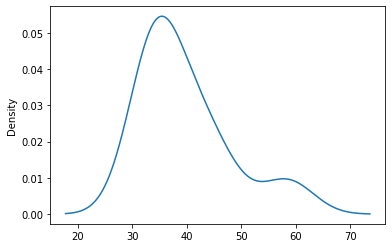

In [99]:
bestpos3['WIN%'].plot.kde()

Since the data is not normal we cannot use ttest_ind to test our hypothesis , thus we have to use mannwhitneyu 

In [94]:
mannwhitneyu(bestpos3win,bestpos7win)

MannwhitneyuResult(statistic=11.0, pvalue=4.1876636593687686e-07)

Since, the pval<0.05 we reject the null hypothesis and thus infer that there is a significant difference between the win % of the teams with best position 1-3 and teams with best position 4-7 

POST OP Analysis :-

In [95]:
bestpos3win.mean()

39.674123684661126

In [96]:
bestpos7win.mean()

30.2910202207672

We can see the significant difference between the means of both the data and thus justify the analysis

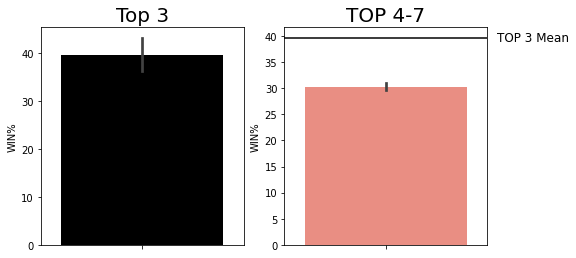

In [181]:
fig,axes=plt.subplots(1,2,figsize=(8,4))
axes[0].set_title('Top 3',fontsize=20)
axes[1].set_title('TOP 4-7',fontsize=20)
sns.barplot(y=bestpos3['WIN%'],ax=axes[0],color='black')
sns.barplot(y=bestpos7['WIN%'],ax=axes[1],color='salmon')
plt.axhline(bestpos3["WIN%"].mean(),color='black')
plt.text(0.55,39,'TOP 3 Mean',fontsize=12)
plt.show()

## LALIGA ANALYSIS ENDS

# WOMEN'S GLAUCOMA ANALYSIS

In [186]:
sample=np.random.randn(200)

In [193]:
sample=(sample*25)+1400

###### Standard Error

In [196]:
se=np.std(sample,ddof=1)/((200)**0.5)
se

1.7224195013123997

The Standard error is a measure that indicates how spread out the values are from the mean of the data 


###### 95% Confidence Interval for the given 200 samples 

In [203]:
interval200=stats.norm.interval(alpha=0.95, loc=np.mean(sample), scale=stats.sem(sample))
interval200

(1396.0474519664608, 1402.7992123441445)

In [201]:
sample2=np.random.randn(100)
sample2=(sample2*25)+1400
se100=stats.sem(sample2)
interval=stats.norm.interval(0.95,np.mean(sample2),se100)
se100,interval

(2.43451688615662, (1393.318264848309, 1402.861395681552))

In [204]:
print('Standard Error of mean of 200 sample= ',se)
print('Standard Error of mean of 100 sampel= ',se100)

print('Confidence Interval of 200 sample= ',interval200)
print('Confidence Interval of 100 sample= ',interval)

Standard Error of mean of 200 sample=  1.7224195013123997
Standard Error of mean of 100 sampel=  2.43451688615662
Confidence Interval of 200 sample=  (1396.0474519664608, 1402.7992123441445)
Confidence Interval of 100 sample=  (1393.318264848309, 1402.861395681552)


##### We Infer frrom the above data that if we increase the sample size we reduce the Standard error of the data and also shrinks the confidence interval 

#### THE INTERVAL OF 100 Sample Is Wider 

Since Standard Error is inversely proportional to the sample size as in the formula 
SE= standard deviation / root of sample size 

Thus with increase in sample size the Value of Se tends to decrease and thus we can say that with increase in sample size
the value of Standard Error decreases 

## GLAUCOMA ANALYSIS ENDS 

# GOLF BALL ANALYSIS 

In [4]:
golf=pd.read_csv('Golf.csv')

In [5]:
golf.shape

(40, 2)

In [6]:
golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


###### NULL Hypothesis : The distance travelled is the same  after the new coating

###### ALTERNATE Hypothesis: There is difference in distance travelled

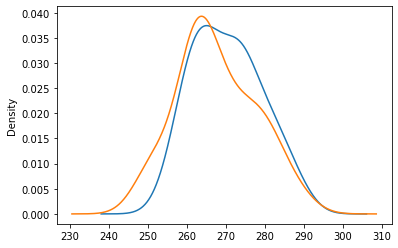

In [7]:
golf['Current'].plot.kde()
golf['New'].plot.kde()
plt.show()

In [8]:
# SINCE, THE data is skewed we use wilcoxon to test the hypothesis of two sample dependent data
wilcoxon(golf['Current']-golf['New'])

WilcoxonResult(statistic=291.5, pvalue=0.2516033447950283)

Since, The pval >0.05 we fail to reject the null hypothesis and thus infer that there is a no difference in the distance travlled by the ball after the new coating. Thus, i can suggest to Par Inc to continue there production without hesitation

#####  95% confidence Interval of mean of Current Ball

In [9]:
stats.norm.interval(0.95,np.mean(golf['Current']),stats.sem(golf['Current']))

(267.56247173951107, 272.9875282604889)

##### 95% confidence Interval of mean of New Ball 

In [11]:
stats.norm.interval(0.95,np.mean(golf['Current']),stats.sem(golf['Current']))

(267.56247173951107, 272.9875282604889)

##### 95% Confidence Interval of Difference in mean of  Current and New Ball 

In [12]:
x1=golf['Current'].mean()
x2=golf['New'].mean()
n=40
x1-x2

2.7749999999999773

In [13]:
std1=np.std(golf['Current'],ddof=1)
std2=np.std(golf['New'],ddof=1)
sem1=std1**2/n
sem2=std2**2/n
sem=(sem1+sem2)

In [14]:
np.sqrt(sem)

2.08903962108466

In [15]:
lb=(x1-x2)-2.09
ub=(x1-x2)+2.09
print(" THE CONFIDENCE INTERVAL OF DIFFEERENCE IN MEAN OF DISTANCE TRAVELLED BY CURRENT AND NEW BALL=",round(lb,2),'-',round(ub,2))

 THE CONFIDENCE INTERVAL OF DIFFEERENCE IN MEAN OF DISTANCE TRAVELLED BY CURRENT AND NEW BALL= 0.68 - 4.86
